### Semana 07 - flow cytomery

  - FlowRepository
    - https://flowrepository.org/
  - Reading Flow cytometry:
    - https://taborlab.github.io/FlowCal/python_tutorial/read.html


### Distribuição normal centrada em 2.5 com SSD = .5

In [1]:
import os, sys, math
import numpy as np
import pandas as pd
import seaborn as sns
from scipy import stats

import matplotlib.pyplot as plt # matplotlib e seu alias plt
%matplotlib inline

In [3]:
# os.system("pip install FlowCal")
import FlowCal

In [22]:
data = FlowCal.io.FCSData('../data/PBMC_NTC Stim 5hr no Blocker_004.fcs')
data.shape

(13305, 12)

In [23]:
data.channels, len(fcs.channels)

(('Time',
  'FSC-A',
  'FSC-H',
  'FSC-W',
  'SSC-A',
  'SSC-H',
  'SSC-W',
  'APC-A',
  'FITC-A',
  'HV 450-A',
  'PE-A',
  'PE-CF594-YG-A'),
 12)

In [24]:
data[0,:]

FCSData([6.9999999e-01, 1.4498331e+05, 8.1411578e+04, 1.1671100e+05,
         1.7665258e+05, 7.5649055e+04, 1.5303700e+05, 9.1559998e+01,
         2.1483000e+02, 1.5648000e+02, 2.2720000e+02, 1.2080000e+02],
        dtype=float32)

In [26]:
fcs = data[:, 1]
fcs[:20]

FCSData([144983.31 , 113651.43 , 137519.52 , 109888.71 , 101237.67 ,
          86598.17 , 101736.16 ,  69103.13 ,  85224.67 , 222037.33 ,
          77934.4  , 151982.14 , 102950.86 , 162891.75 ,  79742.06 ,
         147677.39 ,  67935.32 , 111576.445,  92703.88 ,  57322.52 ],
        dtype=float32)

In [28]:
ssc = data[:, 4]
ssc[:20]

FCSData([176652.58 ,  44039.22 , 152549.77 , 164066.88 ,  86885.25 ,
          19261.23 ,  32343.541,  48482.76 ,  40984.17 ,  52784.94 ,
          32252.4  ,  88179.81 ,  42921.36 ,  69361.26 ,  52964.43 ,
         108991.35 ,  26738.43 ,  35693.4  ,  34099.38 ,  35773.38 ],
        dtype=float32)

In [17]:
import plotly
import plotly.graph_objects as go
import plotly.express as px
template='plotly_white'

import matplotlib as mpl
import pylab as plt
%matplotlib inline

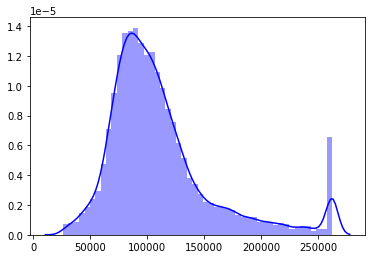

In [43]:
# ret = plt.hist(fcs, bins=100)
fig = go.Figure()
ax = sns.distplot(fcs, hist=True, kde=True, color='blue', hist_kws=dict(alpha=.4))

### Hypothesis testing for Normality

https://machinelearningmastery.com/statistical-hypothesis-tests-in-python-cheat-sheet/

Jason Brownlee on August 15, 2018 in Statistics

In [45]:
# Example of the Shapiro-Wilk Normality Test
from scipy.stats import shapiro

stat, p = shapiro(fcs)

print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
    print('Probably Gaussian')
else:
    print('Probably not Gaussian')
    
mu  = np.mean(fcs)
med = np.median(fcs)
ssd = np.std(fcs)
vc  = ssd/mu

'Mean = %.2f median  = %.2f SSD = %.2f, n = %d, and VC = %.2f'%(mu, med, ssd, len(fcs), vc)

stat=0.862, p=0.000
Probably not Gaussian


'Mean = 110698.71 median  = 99810.57 SSD = 46538.12, n = 13305, and VC = 0.42'

In [ ]:
### Plotly


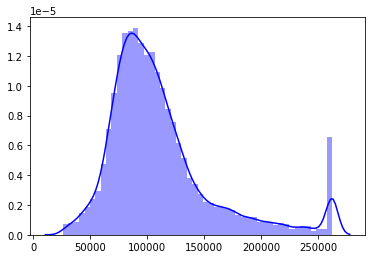

In [47]:
# ret = plt.hist(ssc, bins=100)

stat, p = shapiro(fcs)

stri = 'stat=%.3f, p=%.3f'%(stat, p)
if p > 0.05:
    stri += '\nProbably Gaussian'
else:
    stri += '\nProbably not Gaussian'
    
mu  = np.mean(fcs)
med = np.median(fcs)
ssd = np.std(fcs)
vc  = ssd/mu

stri += '\nMean = %.2f median  = %.2f SSD = %.2f, n = %d, and VC = %.2f'%(mu, med, ssd, len(fcs), vc)


fig = go.Figure()
ax = sns.distplot(fcs, hist=True, kde=True, color='blue', hist_kws=dict(alpha=.4))


fig.update_layout(
    # barmode = 'group',
    autosize=True,
    title=title,
    # width=width,
    # height=height,
    # template=template,
    margin=dict( l=40, r=40, b=40, t=100, pad=4),
    font=dict(
        family="Arial, bold, monospace",
        size=14,
        color='black'
    ),
    xaxis_title="SSC",
    yaxis_title="frequency",
    paper_bgcolor="whitesmoke",
    plot_bgcolor= "whitesmoke", # lightgrey ivory gainsboro whitesmoke lightsteelblue 'lightcyan' 'azure', white, lightgrey, snow ivory beige powderblue
    showlegend=False
)
fig.show()

### Lognormal

In [39]:
fcsLog = [np.log2(x) for x in fcs]
sscLog = [np.log2(x) for x in ssc]

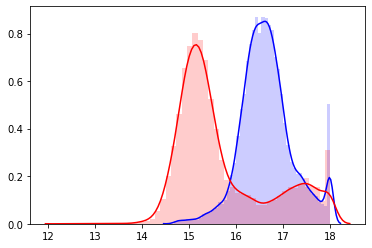

In [41]:
ax = sns.distplot(fcsLog, hist=True, kde=True, color='blue', hist_kws=dict(alpha=.2))
ax = sns.distplot(sscLog, hist=True, kde=True, color='red',  hist_kws=dict(alpha=.2))

In [30]:
title = 'cytometry example'
fontsize=14; fontcolor='black';
width=2000; height=600;

fig = go.Figure()

fig.add_trace(go.Scatter(x=fcs, y=ssc, 
                 # text=textList_one,
                 # hovertemplate = "pos: %{x}<br>count: %{y}</br>%{text}",
                 mode='markers', marker_color='blue') ) # name=name, marker_line_width=1,


fig.update_layout(
    # barmode = 'group',
    autosize=True,
    title=title,
    # width=width,
    # height=height,
    # template=template,
    margin=dict( l=40, r=40, b=40, t=100, pad=4),
    font=dict(
        family="Arial, bold, monospace",
        size=fontsize,
        color=fontcolor
    ),
    xaxis_title="FSC",
    yaxis_title="SSC",
    paper_bgcolor="whitesmoke",
    plot_bgcolor= "whitesmoke", # lightgrey ivory gainsboro whitesmoke lightsteelblue 'lightcyan' 'azure', white, lightgrey, snow ivory beige powderblue
    showlegend=False
)
fig.show()

In [10]:
fcs[1,:]

FCSData([8.9999998e-01, 1.1365143e+05, 7.5283617e+04, 9.8936000e+04,
         4.4039219e+04, 6.8862242e+04, 4.1912000e+04, 5.2079998e+01,
         1.1160000e+02, 8.6400002e+01, 1.0400000e+02, 5.0400002e+01],
        dtype=float32)

In [51]:
N = 1000
MU = 2.5; SD = 0.5
x = np.random.normal(MU, SD, N)

mu  = np.mean(x)
med = np.median(x)
ssd = np.std(x)
vc  = ssd/mu

mu, med, ssd, vc

(2.492691992933456,
 2.5006176799541526,
 0.4926873843019492,
 0.19765273274783685)

(0.5219424557256593, 4.463441530141253)

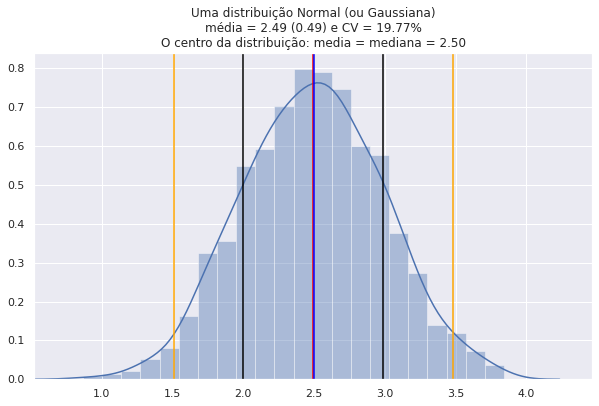

In [52]:
title = "Uma distribuição Normal (ou Gaussiana)\nmédia = %.2f (%.2f) e CV = %.2f%%"%(mu, ssd, vc*100)
title += "\nO centro da distribuição: media = mediana = %.2f"%(med)

fig = plt.figure(figsize=(10,6))
ax = sns.distplot(x, hist=True, kde=True)
ax.axvline(mu, color='red')
ax.axvline(med, color='blue')
ax.axvline(mu+1*ssd, color='black')
ax.axvline(mu-1*ssd, color='black')
ax.axvline(mu+2*ssd, color='orange')
ax.axvline(mu-2*ssd, color='orange')
ax.set_title(title)
ax.set_xlim(mu-4*ssd, mu+4*ssd)

### Amostragem

#### agora vamos simular um experimento no lab com somente 3 amostras!

In [53]:
Nlab = 3
x = np.random.normal(MU, SD, Nlab)

muLab  = np.mean(x)
medLab = np.median(x)
ssdLab = np.std(x)
vcLab  = ssdLab/muLab

muLab, medLab, ssdLab, vcLab


(2.7571122693222243,
 2.8942128094254445,
 0.48661780511119873,
 0.1764954624901158)

In [54]:
(muLab-mu), (medLab - med), (ssdLab - ssd), (vcLab - vc)

(0.2644202763887682,
 0.3935951294712918,
 -0.006069579190750463,
 -0.021157270257721045)

In [55]:
"Erro de media = %.1f%%, mediana = %.1f%%, SSD = %.1f%%, VC = %.1f%%"%(100*(muLab-mu)/mu, 100*(medLab - med)/med, 100*(ssdLab - ssd)/ssd, 100*(vcLab - vc)/vc)

'Erro de media = 10.6%, mediana = 15.7%, SSD = -1.2%, VC = -10.7%'

### Agora vamos analisar o erro e desvio padrão amostral médio

In [56]:
iloop = 50
muLabs=[]; medLabs=[]; ssdLabs=[]; vcLabs=[];

for i in range(iloop):
    x = np.random.normal(MU, SD, Nlab)

    muLab  = np.mean(x)
    medLab = np.median(x)
    ssdLab = np.std(x)
    vcLab  = ssdLab/muLab

    muLabs.append(muLab)
    medLabs.append(medLab)
    ssdLabs.append(ssdLab)
    vcLabs.append(vcLab)
    

In [57]:
"Erro de media = %.1f%%, mediana = %.1f%%, SSD = %.1f%%, VC = %.1f%%"%(
    100*(np.mean(muLabs)  - mu) /mu,  100*(np.mean(medLabs) - med)/med, 
    100*(np.mean(ssdLabs) - ssd)/ssd, 100*(np.mean(vcLabs)  - vc)/vc)

'Erro de media = 2.5%, mediana = 3.4%, SSD = -25.0%, VC = -26.6%'

### Qual o problema??

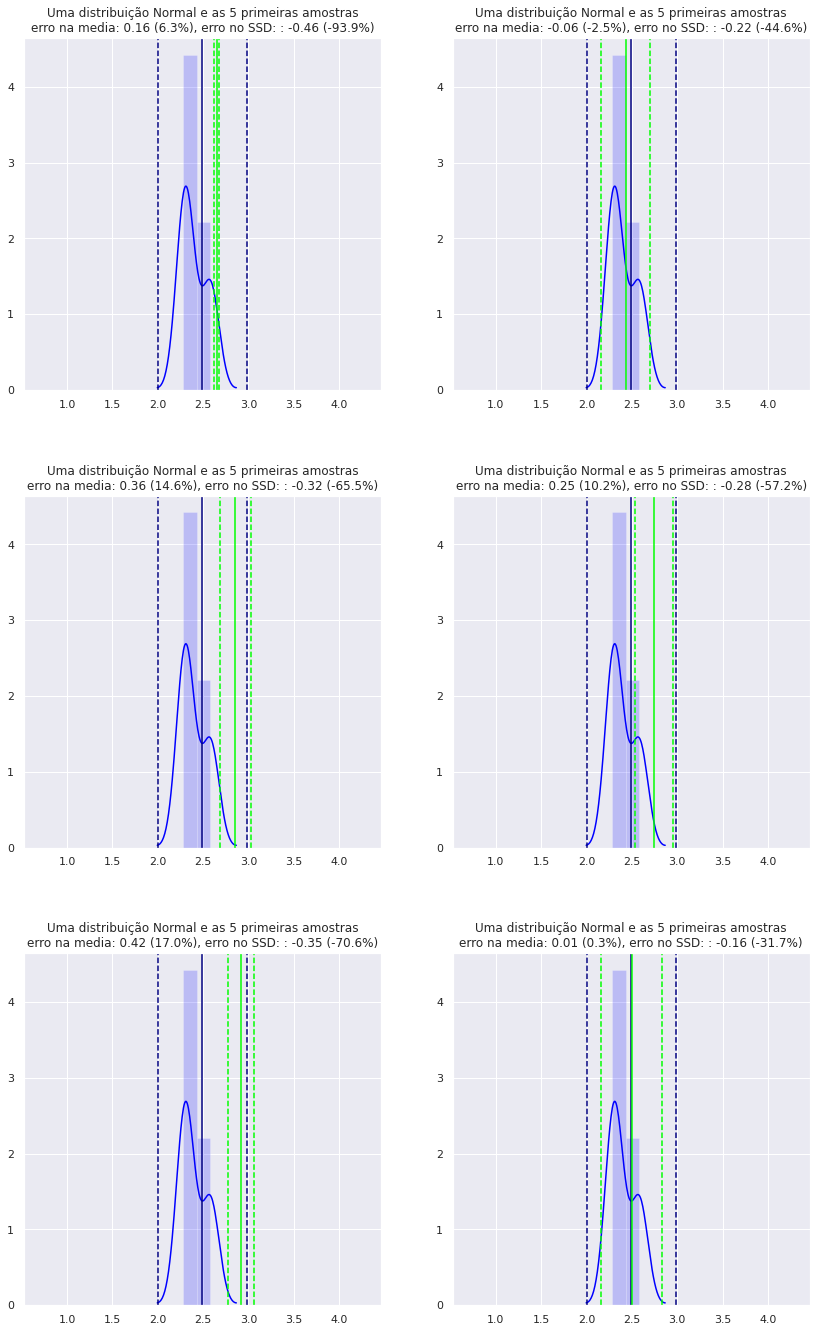

In [58]:
from pylab import subplot

# https://matplotlib.org/3.1.0/gallery/color/named_colors.html
colors2 = ['yellow', 'red', 'brown', 'blue', 'darkviolet', 'lime']
colors = ['lime']*6

sns.set(rc={"figure.figsize": (14,22)})

title = "Uma distribuição Normal e as 5 primeiras amostras"

nfig = 0
for i in range(6):
    nfig += 1
    subplot(3,2,nfig)
        
    ax = sns.distplot(x, hist=True, kde=True, color='blue', hist_kws=dict(alpha=.2))
    ax.axvline(mu, color='navy')
    ax.axvline(mu+1*ssd, color='navy', linestyle='--')
    ax.axvline(mu-1*ssd, color='navy', linestyle='--')

    mu2  = muLabs[i]
    ssd2 = ssdLabs[i]
    
    ax.axvline(mu2, color=colors[i])
    ax.axvline(mu2+1*ssd2, color=colors[i], linestyle='--')
    ax.axvline(mu2-1*ssd2, color=colors[i], linestyle='--')
        
    ax.set_xlim(mu-4*ssd, mu+4*ssd)
    
    emu = mu2 - mu
    essd = ssd2 - ssd
    
    p_emu  = 100*(mu2 - mu)/mu
    p_essd = 100*(ssd2 - ssd)/ssd

    title2 = title + "\nerro na media: %.2f (%.1f%%), erro no SSD: : %.2f (%.1f%%)"%(emu, p_emu, essd, p_essd)
    
    plt.title(title2)
    
plt.subplots_adjust(left=0.12, bottom=0.1, right=0.9, top=0.9, wspace=0.2, hspace=0.3)  

### Qual o problema??